In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import gc
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.float_format', lambda x: '%.f' % x)

In [2]:
import time

In [41]:
path = "safety/features"
files = os.listdir(path)

In [42]:
df = pd.DataFrame()

In [43]:
for f in files:
    data = pd.read_csv(path+'//'+f)
    df = df.append(data)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [44]:
df['Unnamed: 0'].unique()

array([nan], dtype=object)

In [45]:
del df['Unnamed: 0']

In [46]:
df.head()

,Accuracy,Bearing,Speed,acceleration_x,acceleration_y,acceleration_z,bookingID,gyro_x,gyro_y,gyro_z,second
0,8.000,253.815094,22.800875,-0.018842,-9.778915,0.141910,6.786048e+11,0.000004,0.127894,-0.003946,849.0
1,6.000,46.780491,8.029377,3.053528,-11.339175,1.049893,1.975685e+11,-0.228431,0.100745,-0.009538,656.0
2,3.000,301.000000,0.000000,0.567177,9.913507,0.318716,1.709397e+12,-0.022131,0.011083,0.002845,369.0
3,3.482,297.000000,3.599888,3.598595,10.094262,-1.747821,9.191230e+11,0.002806,0.166651,0.088069,1468.0
4,3.210,0.000000,0.000000,0.466644,8.914932,3.394867,1.039382e+12,0.002533,0.005173,0.002060,276.0


In [47]:
labels = pd.read_csv("safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv")

Removing labels with duplicate values

In [48]:
idana = labels.groupby('bookingID').agg({'bookingID':'count'})
idana.columns = ['Counts']
idana.reset_index()
idana.sort_values(by='Counts', ascending=False)
idana = idana.loc[idana['Counts'] > 1]

In [49]:
labels = labels.loc[~labels['bookingID'].isin(idana.index)]

In [50]:
labels.count()

bookingID    19982
label        19982
dtype: int64

In [51]:
data = pd.merge(df, labels, how='inner', on='bookingID')

In [53]:
df.count()
#16135561

Accuracy          16135561
Bearing           16135561
Speed             16135561
acceleration_x    16135561
acceleration_y    16135561
acceleration_z    16135561
bookingID         16135561
gyro_x            16135561
gyro_y            16135561
gyro_z            16135561
second            16135561
dtype: int64

In [54]:
del df
gc.collect()

601

In [55]:
data['bookingID'] = data.bookingID.astype(int)

In [56]:
data['bookingID'] = data.bookingID.astype(str)

In [58]:
print("No of Rows: {}, No of Columns: {}".format(data.bookingID.count(), len(data.columns)))
data.head()

No of Rows: 16116704, No of Columns: 12


,Accuracy,Bearing,Speed,acceleration_x,acceleration_y,acceleration_z,bookingID,gyro_x,gyro_y,gyro_z,second,label
0,8.0,253.815094,22.800875,-0.018842,-9.778915,0.141910,678604832892,0.000004,0.127894,-0.003946,849.0,0
1,6.0,87.203369,3.983518,0.268567,-9.703848,-1.076660,678604832892,0.002257,0.005405,-0.008485,600.0,0
2,6.0,249.762634,23.714880,0.645996,-10.483231,-0.967947,678604832892,0.002164,0.023651,-0.003111,916.0,0
3,6.0,267.421600,20.843636,0.004935,-12.841415,-2.063150,678604832892,-0.015882,-0.070103,0.065709,997.0,0
4,8.0,272.301819,3.438376,0.213388,-9.690390,-0.765027,678604832892,-0.002547,0.129146,-0.044486,3.0,0


In [59]:
labels.label.sum()

4983

In [89]:
safe_rides = labels.loc[labels['label'] == 0]
not_safe_rides = labels.loc[labels['label'] == 1]
safe_rides['bookingID'] = safe_rides.bookingID.astype(str)
not_safe_rides['bookingID'] = not_safe_rides.bookingID.astype(str)
safe_rides = safe_rides.bookingID
not_safe_rides = not_safe_rides.bookingID

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [60]:
#5001/20018
4983/19982

0.24937443699329395

In [297]:
def q10(x):
    return x.quantile(0.10)
def q20(x):
    return x.quantile(0.20)
def q30(x):
    return x.quantile(0.30)
def q40(x):
    return x.quantile(0.40)
def q50(x):
     return x.quantile(0.50)
def q60(x):
    return x.quantile(0.60)
def q70(x):
    return x.quantile(0.70)
def q80(x):
    return x.quantile(0.80)
def q90(x):
    return x.quantile(0.90)
def q95(x):
    return x.quantile(0.95)

In [298]:
Model_Data = data.groupby(['bookingID'], axis=0).agg({"Accuracy":["count", "min", "mean", np.std, q10, q20, q30, q40, q50, q60, q70, q80, q90, q95, "max"],
                                         "Bearing":["count", "min", "mean", np.std, q10, q20, q30, q40, q50, q60, q70, q80, q90, q95, "max"],
                                         "Speed":["count", "min", "mean", np.std, q10, q20, q30, q40, q50, q60, q70, q80, q90, q95, "max"],
                                         "acceleration_x":["count", "min", "mean", np.std, q10, q20, q30, q40, q50, q60, q70, q80, q90, q95, "max"], 
                                         "acceleration_y":["count", "min", "mean", np.std, q10, q20, q30, q40, q50, q60, q70, q80, q90, q95, "max"],
                                         "acceleration_z":["count", "min", "mean", np.std, q10, q20, q30, q40, q50, q60, q70, q80, q90, q95, "max"],
                                         "gyro_x":["count", "min", "mean", np.std, q10, q20, q30, q40, q50, q60, q70, q80, q90, q95, "max"],
                                         "gyro_y":["count", "min", "mean", np.std, q10, q20, q30, q40, q50, q60, q70, q80, q90, q95, "max"],
                                         "gyro_z":["count", "min", "mean", np.std, q10, q20, q30, q40, q50, q60, q70, q80, q90, q95, "max"],
                                         "second":"mean",
                                         "second":"max",
                                         "label":"sum"})

In [299]:
Model_Data.to_csv("safety/Modeled_data_percentiles_v1.csv", index=False)

In [300]:
Model_Data = Model_Data.reset_index()

In [301]:
column = []
for i in Model_Data.columns:
    column.append('_'.join(i))

In [302]:
Model_Data.columns = column

In [322]:
Model_Data.to_csv("safety/Modeled_data_percentiles_cleaned_v1.csv", index=False)

In [272]:
Model_Data = pd.read_csv("safety/Modeled_data_v2.csv")

In [304]:
Model_Data.head(10)

,bookingID_,Accuracy_count,Accuracy_min,Accuracy_mean,Accuracy_std,Accuracy_q10,Accuracy_q20,Accuracy_q30,Accuracy_q40,Accuracy_q50,Accuracy_q60,Accuracy_q70,Accuracy_q80,Accuracy_q90,Accuracy_q95,Accuracy_max,Bearing_count,Bearing_min,Bearing_mean,Bearing_std,Bearing_q10,Bearing_q20,Bearing_q30,Bearing_q40,Bearing_q50,Bearing_q60,Bearing_q70,Bearing_q80,Bearing_q90,Bearing_q95,Bearing_max,Speed_count,Speed_min,Speed_mean,Speed_std,Speed_q10,Speed_q20,Speed_q30,Speed_q40,Speed_q50,Speed_q60,Speed_q70,Speed_q80,Speed_q90,Speed_q95,Speed_max,acceleration_x_count,acceleration_x_min,acceleration_x_mean,acceleration_x_std,acceleration_x_q10,acceleration_x_q20,acceleration_x_q30,acceleration_x_q40,acceleration_x_q50,acceleration_x_q60,acceleration_x_q70,acceleration_x_q80,acceleration_x_q90,acceleration_x_q95,acceleration_x_max,acceleration_y_count,acceleration_y_min,acceleration_y_mean,acceleration_y_std,acceleration_y_q10,acceleration_y_q20,acceleration_y_q30,acceleration_y_q40,acceleration_y_q50,acceleration_y_q60,acceleration_y_q70,acceleration_y_q80,acceleration_y_q90,acceleration_y_q95,acceleration_y_max,acceleration_z_count,acceleration_z_min,acceleration_z_mean,acceleration_z_std,acceleration_z_q10,acceleration_z_q20,acceleration_z_q30,acceleration_z_q40,acceleration_z_q50,acceleration_z_q60,acceleration_z_q70,acceleration_z_q80,acceleration_z_q90,acceleration_z_q95,acceleration_z_max,gyro_x_count,gyro_x_min,gyro_x_mean,gyro_x_std,gyro_x_q10,gyro_x_q20,gyro_x_q30,gyro_x_q40,gyro_x_q50,gyro_x_q60,gyro_x_q70,gyro_x_q80,gyro_x_q90,gyro_x_q95,gyro_x_max,gyro_y_count,gyro_y_min,gyro_y_mean,gyro_y_std,gyro_y_q10,gyro_y_q20,gyro_y_q30,gyro_y_q40,gyro_y_q50,gyro_y_q60,gyro_y_q70,gyro_y_q80,gyro_y_q90,gyro_y_q95,gyro_y_max,gyro_z_count,gyro_z_min,gyro_z_mean,gyro_z_std,gyro_z_q10,gyro_z_q20,gyro_z_q30,gyro_z_q40,gyro_z_q50,gyro_z_q60,gyro_z_q70,gyro_z_q80,gyro_z_q90,gyro_z_q95,gyro_z_max,second_max,label_sum
0,0,1004,4.000000,10.165339,3.855898,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,12.000000,16.000000,16.000000,16.000000,48.000000,1004,0.037464,176.526099,129.231351,19.990553,38.000866,40.063709,143.298294,144.299423,238.402939,292.534244,336.754883,342.453766,354.132397,359.979767,1004,-1.000000,8.994822,7.199919,0.162426,0.439218,2.761940,5.172356,8.503366,12.032032,14.473692,16.759577,18.748623,19.916380,22.946083,1004,-4.692294,-0.711264,0.928022,-1.745490,-1.358386,-1.061781,-0.885762,-0.725250,-0.565097,-0.396076,-0.130306,0.347582,0.832124,4.782614,1004,-12.764703,-9.613822,0.639934,-10.307197,-10.021882,-9.830580,-9.719041,-9.622127,-9.532689,-9.416679,-9.237086,-8.936234,-8.572996,-6.119916,1004,-6.251807,-1.619658,1.141266,-3.025669,-2.440579,-2.015224,-1.761147,-1.607663,-1.412279,-1.164258,-0.860760,-0.210278,0.356083,2.318857,1004,-0.392537,0.003328,0.065954,-0.071961,-0.037103,-0.017459,-0.006246,0.002575,0.011733,0.025708,0.042394,0.083481,0.110465,0.438371,1004,-0.609930,-0.006118,0.100225,-0.106299,-0.061579,-0.033872,-0.017729,-0.002239,0.009597,0.024126,0.050364,0.097003,0.141077,0.469724,1004,-0.731892,-0.004188,0.063685,-0.069433,-0.042695,-0.022779,-0.013226,-0.003522,0.005294,0.015275,0.030390,0.061658,0.085728,0.372807,"1,589.000000",0
1,1,851,3.000000,3.718763,0.597933,3.000000,3.000000,3.224000,3.900000,3.900000,4.000000,4.000000,4.000000,4.000000,4.054000,7.709000,851,0.000000,124.198590,89.861236,36.000000,49.000000,53.000000,58.000000,110.000000,126.000000,131.000000,211.000000,294.000000,303.000000,337.000000,851,-1.000000,7.881588,7.059362,0.000000,0.000000,1.576404,4.173302,6.904588,9.827178,12.118372,15.181473,18.593060,19.862372,21.882141,851,-5.352994,-0.525406,0.744157,-1.165900,-0.903706,-0.786246,-0.675960,-0.563126,-0.420537,-0.284115,-0.172699,0.059367,0.355017,3.813341,851,6.623425,9.532086,0.533915,8.885611,9.185441,9.347671,9.450852,9.537963,9.620276,9.734087,9.878850,10.133488,10.378984,12.536156,851,-5.355455,-2.198999,0.854271,-3.259849,-2.752384,-2.449556,-2.314063,-2.175

In [305]:
Model_Data['trip_duration_diff'] = Model_Data.apply(lambda x: x['second_max'] - x['Speed_count'], axis=1)

In [306]:
Model_Data['label'] = Model_Data.apply(lambda x: 0 if x['label_sum'] == 0 else 1, axis=1)

In [321]:
Model_Data = Model_Data[['bookingID_','Accuracy_min','Accuracy_mean','Accuracy_std','Accuracy_q10','Accuracy_q20',
                         'Accuracy_q30','Accuracy_q40','Accuracy_q50','Accuracy_q60','Accuracy_q70','Accuracy_q80','Accuracy_q90',
                         'Accuracy_q95','Accuracy_max','Bearing_min','Bearing_mean','Bearing_std','Bearing_q10','Bearing_q20',
                         'Bearing_q30','Bearing_q40','Bearing_q50','Bearing_q60','Bearing_q70','Bearing_q80','Bearing_q90',
                         'Bearing_q95','Bearing_max','Speed_count','Speed_min','Speed_mean','Speed_std','Speed_q10','Speed_q20',
                         'Speed_q30','Speed_q40','Speed_q50','Speed_q60','Speed_q70','Speed_q80','Speed_q90','Speed_q95',
                         'Speed_max','acceleration_x_min','acceleration_x_mean','acceleration_x_std','acceleration_x_q10',
                         'acceleration_x_q20','acceleration_x_q30','acceleration_x_q40','acceleration_x_q50',
                         'acceleration_x_q60','acceleration_x_q70','acceleration_x_q80','acceleration_x_q90',
                         'acceleration_x_q95','acceleration_x_max','acceleration_y_min','acceleration_y_mean',
                         'acceleration_y_std','acceleration_y_q10','acceleration_y_q20','acceleration_y_q30',
                         'acceleration_y_q40','acceleration_y_q50','acceleration_y_q60','acceleration_y_q70',
                         'acceleration_y_q80','acceleration_y_q90','acceleration_y_q95','acceleration_y_max',
                         'acceleration_z_min','acceleration_z_mean','acceleration_z_std','acceleration_z_q10',
                         'acceleration_z_q20','acceleration_z_q30','acceleration_z_q40','acceleration_z_q50',
                         'acceleration_z_q60','acceleration_z_q70','acceleration_z_q80','acceleration_z_q90',
                         'acceleration_z_q95','acceleration_z_max','gyro_x_min','gyro_x_mean','gyro_x_std','gyro_x_q10',
                         'gyro_x_q20','gyro_x_q30','gyro_x_q40','gyro_x_q50','gyro_x_q60','gyro_x_q70','gyro_x_q80',
                         'gyro_x_q90','gyro_x_q95','gyro_x_max','gyro_y_min','gyro_y_mean','gyro_y_std','gyro_y_q10','gyro_y_q20',
                         'gyro_y_q30','gyro_y_q40','gyro_y_q50','gyro_y_q60','gyro_y_q70','gyro_y_q80','gyro_y_q90','gyro_y_q95',
                         'gyro_y_max','gyro_z_min','gyro_z_mean','gyro_z_std','gyro_z_q10','gyro_z_q20','gyro_z_q30',
                         'gyro_z_q40','gyro_z_q50','gyro_z_q60','gyro_z_q70','gyro_z_q80','gyro_z_q90','gyro_z_q95',
                         'gyro_z_max','second_max','trip_duration_diff','label']]

In [314]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [323]:
len(Model_Data.columns)

131

In [324]:
X = Model_Data.iloc[:, 1:130]
y = Model_Data.iloc[:, 130]

In [336]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [296]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train.values)
X_test = sc.transform(X_test.values)

In [337]:
import statsmodels.formula.api as sm

In [338]:
model = sm.Logit(y_train, X_train)

In [339]:
result = model.fit(method='bfgs')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: invalid value encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: invalid value encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.532801
         Iterations: 35
         Function evaluations: 51
         Gradient evaluations: 42


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [340]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                15985
Model:                          Logit   Df Residuals:                    15857
Method:                           MLE   Df Model:                          127
Date:                Mon, 26 Aug 2019   Pseudo R-squ.:                 0.04626
Time:                        15:18:41   Log-Likelihood:                -8516.8
converged:                      False   LL-Null:                       -8930.0
                                        LLR p-value:                5.764e-103
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Accuracy_min            0.0090      0.014      0.640      0.522      -0.018       0.036
Accuracy_mean           0.0009      0.009      0.106      0.916      -0.016       0.018
Accuracy_std           -0.0021      0.003     -0.797      0.425      -0.007       0.003
Accuracy_q10           -0.0017      0.020     -0.086      0.931      -0.041       0.038
Accuracy_q20            0.0255      0.025      1.007      0.314      -0.024       0.075
Accuracy_q30           -0.0254      0.022     -1.154      0.249      -0.069       0.018
Accuracy_q40           -0.0052      0.012     -0.434      0.664      -0.028       0.018
Accuracy_q50            0.0051      0.008      0.670      0.503      -0.010       0.020
Accuracy_q60           -0.0037      0.007     -0.499      0.617      -0.018       0.011
Accuracy_q70            0.0003      0.001      0.338      0.735      -0.002       0.002
Accuracy_q80           -0.0003      0.001     -0.315      0.752      -0.002       0.002
Accuracy_q90           -0.0002      0.001     -0.270      0.787      -0.001       0.001
Accuracy_q95           -0.0002      0.000     -0.447      0.655      -0.001       0.001
Accuracy_max            0.0004      0.000      2.952      0.003       0.000       0.001
Bearing_min            -0.0064      0.001     -4.827      0.000      -0.009      -0.004
Bearing_mean           -0.0134      0.008     -1.665      0.096      -0.029       0.002
Bearing_std            -0.0049      0.004     -1.226      0.220      -0.013       0.003
Bearing_q10            -0.0026      0.001     -2.047      0.041      -0.005      -0.000
Bearing_q20             0.0014      0.001      1.224      0.221      -0.001       0.004
Bearing_q30             0.0015      0.001      1.343      0.179      -0.001       0.004
Bearing_q40             0.0015      0.001      1.248      0.212      -0.001       0.004
Bearing_q50         -5.115e-05      0.001     -0.042      0.967      -0.002       0.002
Bearing_q60             0.0017      0.001      1.329      0.184      -0.001       0.004
Bearing_q70             0.0034      0.001      2.669      0.008       0.001       0.006
Bearing_q80             0.0002      0.001      0.183      0.855      -0.002       0.003
Bearing_q90             0.0019      0.001      1.587      0.112      -0.000       0.004
Bearing_q95             0.0019      0.001      1.613      0.107      -0.000       0.004
Bearing_max            -0.0057      0.001     -8.870      0.000      -0.007      -0.004
Speed_count             0.0015   1104.068   1.33e-06      1.000   -2163.933    2163.935
Speed_min              -0.1008      0.038     -2.678      0.007      -0.175      -0.027
Speed_mean             -0.0284      0.363     -0.078      0.937      -0.739       0.682
Speed_std               0.0121      0.108      0.111      0.911      -0.200       0.225
Speed_q10              -0.0840      0.050     -1.677      0.094      -0.182       0.014
Speed_q20              -0.0291      0.044     -0.655      0.513      -0.1

In [176]:
from sklearn.linear_model import LogisticRegression

In [359]:
#creating logisting regfession model from training Data
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [369]:
#apply the model on the test data
y_pred = LogReg.predict(X_test)

In [370]:
y_pred

TypeError: '>' not supported between instances of 'int' and 'str'

In [352]:
y_pred = result.predict(X_test)

In [353]:
y_pred = (y_pred > 0.5)

In [354]:
from sklearn.metrics import confusion_matrix, classification_report

In [355]:
y_test.astype(int)

16494    1
12265    0
4585     0
2791     0
18499    0
14137    0
10312    0
9828     0
10603    0
8466     0
1946     1
15388    0
10280    0
8037     0
13079    0
15410    0
3268     1
821      1
1190     0
13251    0
14432    0
17799    0
4914     0
14876    1
4217     1
4266     0
16274    0
16059    1
14528    0
13944    0
12651    0
1425     0
8321     1
4340     1
4692     0
7442     0
5136     1
5002     0
4008     0
5523     0
5270     0
14346    0
11293    1
3706     0
763      0
134      0
7028     0
5855     1
8380     1
17289    0
7112     0
11138    0
9858     0
439      0
19191    1
18830    0
13265    0
12136    0
13906    0
19752    0
51       0
15837    0
443      0
17828    0
17855    1
7364     0
6184     0
4308     0
9438     1
15266    0
15639    0
1884     0
13128    1
14980    0
14022    0
3193     0
19626    0
10207    0
8485     1
772      0
385      0
1557     0
9490     0
13125    1
2179     0
295      0
10410    0
6343     1
17595    0
15740    0
19475    0

In [356]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

TypeError: '>' not supported between instances of 'int' and 'str'

In [286]:
from sklearn.metrics import accuracy_score

In [357]:
print(accuracy_score(y_test, y_pred))

0.7533149862396797


In [358]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      2957
           1       0.60      0.16      0.25      1040

   micro avg       0.75      0.75      0.75      3997
   macro avg       0.68      0.56      0.55      3997
weighted avg       0.72      0.75      0.70      3997



In [97]:
pd.options.display.float_format = '{:20,.6f}'.format

In [98]:
data.loc[data['bookingID'].isin(safe_rides.to_list())] \
[['bookingID', 'Speed','acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']].describe()

,Speed,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,"11,196,690.000000","11,196,690.000000","11,196,690.000000","11,196,690.000000","11,196,690.000000","11,196,690.000000","11,196,690.000000"
mean,9.180230,0.069215,4.533586,0.866201,-0.001917,0.000590,-0.000342
std,8.074201,1.315805,8.188778,3.059374,0.118493,0.249789,0.113978
min,-1.719776,-33.440838,-57.800190,-78.448420,-33.471750,-74.888610,-36.511543
25%,1.260000,-0.498009,-1.999219,-0.907761,-0.026714,-0.029620,-0.018386
50%,7.883960,0.061196,9.117126,0.756591,-0.000748,0.000279,-0.000035
75%,15.650000,0.624906,9.718362,2.671158,0.022984,0.031038,0.018093
max,56.698967,47.708320,61.159355,63.656803,39.839750,62.542023,66.300780


In [99]:
data.loc[data['bookingID'].isin(not_safe_rides.to_list())] \
[['bookingID', 'Speed','acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']].describe()

,Speed,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,"4,920,014.000000","4,920,014.000000","4,920,014.000000","4,920,014.000000","4,920,014.000000","4,920,014.000000","4,920,014.000000"
mean,8.611008,0.068444,4.337100,0.963385,-0.001234,-0.000380,-0.000075
std,8.165881,1.645660,7.987946,3.646557,0.191202,0.487056,0.205760
min,-2.000000,-78.419685,-72.994119,-75.936990,-48.455750,-57.344890,-53.554450
25%,0.538504,-0.533923,-1.859183,-0.982604,-0.026904,-0.030857,-0.019548
50%,6.692664,0.061210,8.991425,0.829116,-0.000447,0.000244,-0.000045
75%,15.050000,0.660820,9.688137,2.951265,0.024242,0.032266,0.018646
max,148.018630,66.873456,75.055885,78.055756,30.709417,80.314964,55.948853


In [ ]:
Model_Data

In [66]:
sample_0 = data.loc[data['bookingID'] == '1013612281866'].sort_values(by ='second') #542
sample_1 = data.loc[data['bookingID'] == '1013612281891'].sort_values(by ='second') #506

In [63]:
#1013612281987.0 -> 0
#1013612282014.0 -> 1

In [29]:
sample_0.columns

Index(['Accuracy', 'Bearing', 'Speed', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'bookingID', 'gyro_x', 'gyro_y', 'gyro_z', 'second',
       'label'],
      dtype='object')

In [74]:
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

<IPython.core.display.Javascript object>


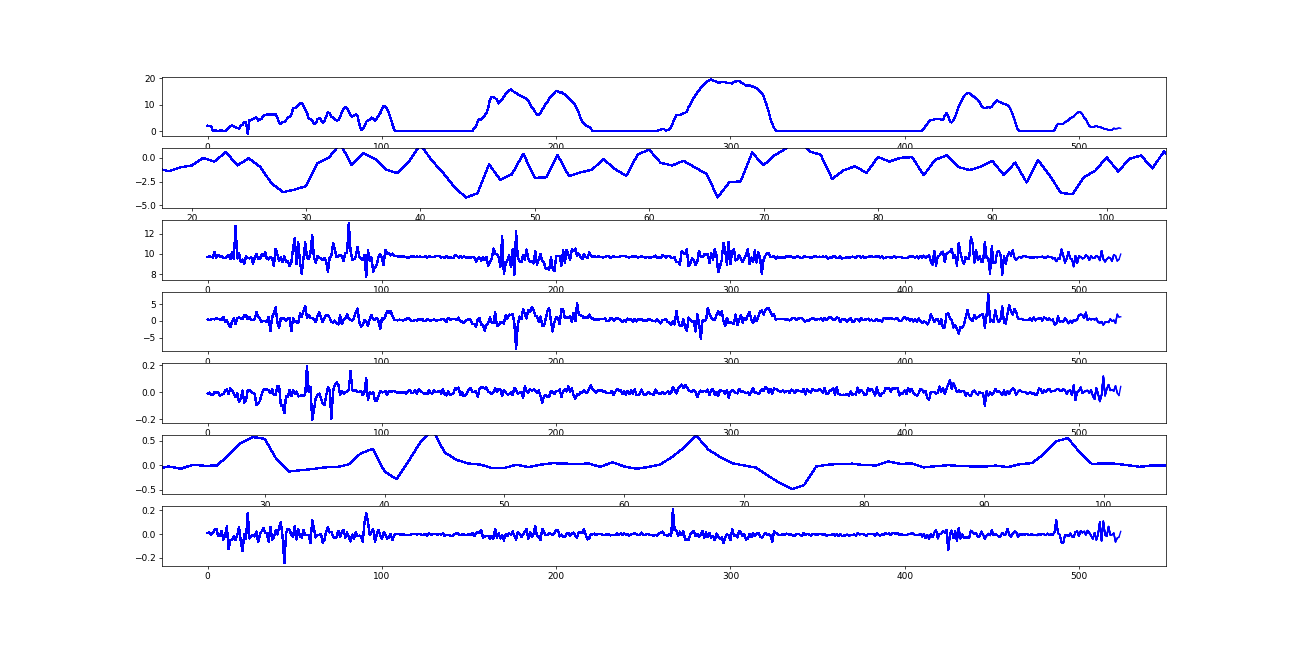

In [77]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(711)
ax2 = fig.add_subplot(712)   
ax3 = fig.add_subplot(713)
ax4 = fig.add_subplot(714)
ax5 = fig.add_subplot(715)
ax6 = fig.add_subplot(716)
ax7 = fig.add_subplot(717)
fig.show()

#fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15,10))
#fig.show()

In [78]:
x, y1, y2, y3, y4, y5, y6, y7 = [], [], [], [], [], [], [], []

for i in sample_0[['second','Speed','acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']].values:
    x.append(i[0])
    y1.append(i[1].item())
    y2.append(i[2].item())
    y3.append(i[3].item())
    y4.append(i[4].item())
    y5.append(i[5].item())
    y6.append(i[6].item())
    y7.append(i[7].item())
    ax1.plot(x, y1, color='b')
    ax2.plot(x, y2, color='b')
    ax3.plot(x, y3, color='b')
    ax4.plot(x, y4, color='b')
    ax5.plot(x, y5, color='b')
    ax6.plot(x, y6, color='b')
    ax7.plot(x, y7, color='b')
    fig.canvas.draw()
    #ax.set_xlim(left=max(0, i[0]-50), right=i[0]+50)    
    time.sleep(0.01)


<IPython.core.display.Javascript object>


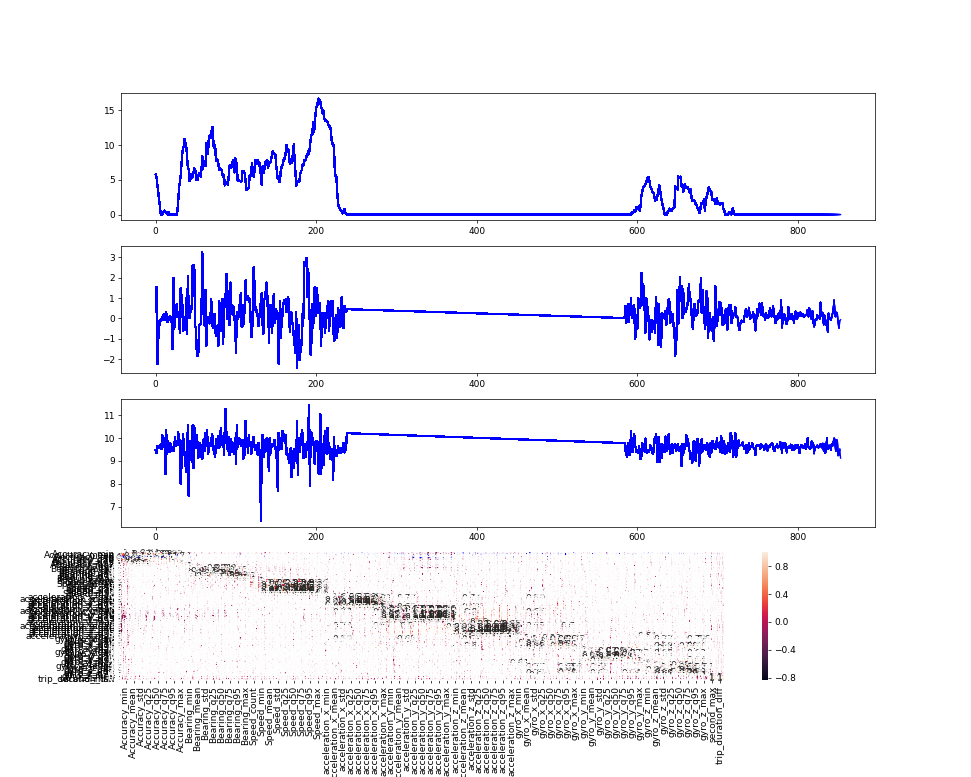

In [100]:
fig2 = plt.figure(figsize=(15,12))
ax01 = fig2.add_subplot(411)
ax02 = fig2.add_subplot(412)   
ax03 = fig2.add_subplot(413)
ax04 = fig2.add_subplot(414)
fig2.show()

In [101]:
x, y1, y2, y3, y4 = [], [], [], [], []

for i in sample_1[['second','Speed', 'acceleration_x', 'acceleration_y', 'acceleration_z']].values:
    x.append(i[0])
    y1.append(i[1].item())
    y2.append(i[2].item())
    y3.append(i[3].item())
    y4.append(i[4].item())
    ax01.plot(x, y1, color='b')
    ax02.plot(x, y2, color='b')
    ax03.plot(x, y3, color='b')
    ax04.plot(x, y4, color='b')
    fig2.canvas.draw()
    #ax.set_xlim(left=max(0, i[0]-50), right=i[0]+50)    
    time.sleep(0.01)

In [73]:
sample_1[['second','Speed', 'acceleration_x', 'acceleration_y', 'acceleration_z']]

,second,Speed,acceleration_x,acceleration_y,acceleration_z
14113007,0.0,0.000000,-0.906225,9.547540,-1.969930
14113353,1.0,0.000000,-0.910218,9.573196,-2.032428
14113264,2.0,0.000000,-0.851665,9.256682,-1.912153
14113053,3.0,0.000000,-0.797595,9.198331,-1.941841
14113257,4.0,0.000000,-0.729283,9.309480,-1.782339
14113261,5.0,0.000000,-0.932771,9.407336,-2.270680
14113590,6.0,0.000000,-0.903447,9.417439,-1.988997
14112993,7.0,0.000000,-0.883776,9.456838,-1.982897
14112918,8.0,0.000000,-0.891725,9.445873,-1.963964
14113126,9.0,0.000000,-0.909509,9.441267,-1.928520


<IPython.core.display.Javascript object>


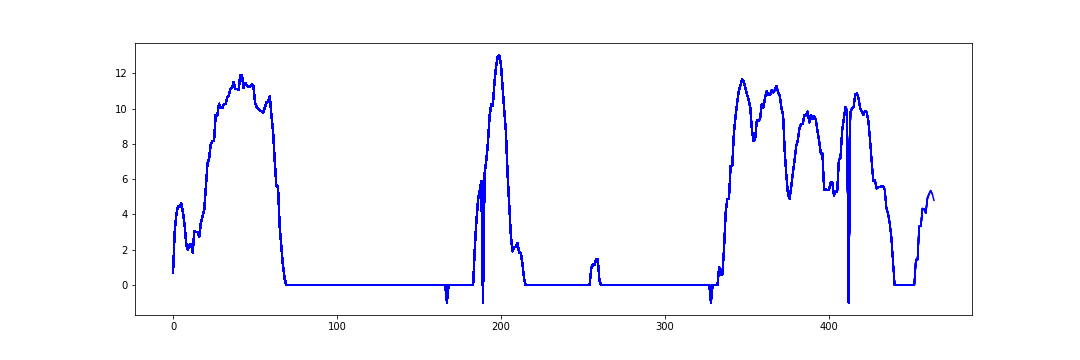

In [113]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111)
fig1.show()

In [114]:
x, y = [], []

for i in sample_1[['second','Speed']].values:
    x.append(i[0])
    y.append(i[1].item())
    ax1.plot(x, y, color='b')
    fig1.canvas.draw()
    #ax.set_xlim(left=max(0, i[0]-50), right=i[0]+50)    
    time.sleep(0.01)

In [62]:
plt.close()

In [15]:
data.loc[data.label == 1].groupby(['bookingID'], axis=0).agg(
        {"acceleration_x":"mean",
         "acceleration_y":"mean",
         "acceleration_z":"mean",
         "gyro_x":"mean",
         "gyro_y":"mean",
         "gyro_z":"mean",
         "Speed":"mean"}).reset_index()

,bookingID,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed
0,1.000000e+00,-0.525406,9.532086,-2.198999,-0.002467,-0.007540,0.000405,7.881588
1,2.000000e+00,0.306786,9.843183,0.139347,0.006458,-0.012861,0.002597,3.157213
2,4.000000e+00,-0.365117,-9.406439,-2.613639,-0.022884,0.023232,-0.000376,6.150996
3,1.300000e+01,0.993263,8.695737,4.421685,-0.002206,0.009890,0.005380,15.521918
4,1.800000e+01,0.104708,-9.790989,0.652146,-0.006360,-0.017947,-0.002716,4.738116
5,3.500000e+01,-0.147625,8.909631,-0.081252,-0.014138,0.031415,-0.001331,16.619441
6,4.100000e+01,0.099424,9.770956,-0.653866,-0.002039,-0.005340,0.001372,2.123185
7,4.700000e+01,0.929326,5.093129,8.235005,0.018512,-0.000249,0.044984,10.376869
8,5.200000e+01,0.924517,7.973439,5.659571,0.000796,-0.008567,-0.007151,4.904893
9,5.700000e+01,-0.201948,8.869689,3.775003,-0.006832,-0.002085,-0.003429,9.363595


In [28]:
data.loc[data.label == 0].groupby(['bookingID'], axis=0).agg(
        {"acceleration_x":"mean",
         "acceleration_y":"mean",
         "acceleration_z":"mean",
         "gyro_x":"mean",
         "gyro_y":"mean",
         "gyro_z":"mean",
         "Speed":"mean"}).reset_index()

,bookingID,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed
0,0.000000e+00,-0.711264,-9.613822,-1.619658,0.003328,-0.006118,-0.004188,8.994822
1,6.000000e+00,0.490616,9.538043,2.355059,0.003877,0.000436,0.002930,4.628921
2,7.000000e+00,1.327679,9.386286,2.139714,-0.003932,0.003424,-0.005800,12.176386
3,8.000000e+00,-1.197008,9.473209,1.707760,0.004716,-0.000694,-0.001139,5.351266
4,1.000000e+01,0.954849,9.229290,-1.576419,-0.001418,0.002311,-0.001383,8.702027
5,1.100000e+01,0.564240,9.738133,0.615137,0.005530,-0.004115,0.003009,6.659024
6,1.300000e+01,0.993263,8.695737,4.421685,-0.002206,0.009890,0.005380,15.521918
7,1.400000e+01,-0.278186,-9.736583,1.205154,0.005947,-0.002755,-0.004238,4.725448
8,1.600000e+01,1.323372,9.760118,0.056907,0.007290,-0.004981,-0.003210,6.094209
9,1.700000e+01,2.860032,9.325441,-1.516561,0.000615,0.009454,0.001992,12.930346
